# Matching Pursuit

Using Theta matrix and naive convolution

Import

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from PIL import Image
import pywt
import pywt.data
from utils_wavelet import *
import scipy.stats as stats

Functions

In [2]:
def fun_conv(A,B):
    conv = signal.fftconvolve(A,B,mode='same')
    return conv

def naive_conv(A,B):
    C = np.zeros(len(A))
    for i in range(len(A)):
        C[i] = np.sum(A*np.roll(np.roll(np.flip(B),1),i))
    return C

def manual_conv(A,B):
    C = np.zeros(len(A))
    for m in range(len(A)):
        for i in range(len(B)):
            C[m] += A[i]*B[m-i]
    return C

def fun_auto(A):
    auto = signal.fftconvolve(A,np.flip(A),mode='same')
    return auto

def imshowArray(arr):
    plt.imshow((arr,arr))
    plt.ylim([0,1])

In [3]:
vec = np.array([6,1,2,7])
print(np.roll(np.flip(vec),1))

[6 7 2 1]


In [4]:
tmp = np.array([1,1,0])
tmp2= np.array([1,3,-2])

print(naive_conv(tmp, tmp2))
print(manual_conv(tmp, tmp2))

[-1.  4.  1.]
[-1.  4.  1.]


Sparse vector a

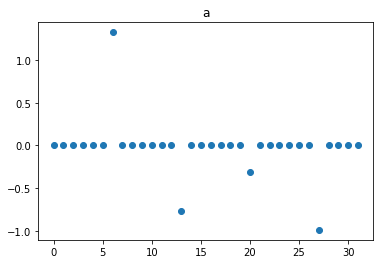

In [5]:
#defining vector a
np.random.seed(24)
a_values = np.random.normal(0, 1, 4)
d = 32
a_real = np.zeros(d)
for a_val in range(len(a_values)):
    a_real[6+7*a_val] = a_values[a_val]

plt.plot(a_real,'o')
plt.title('a')
plt.show()

PSF vector h

In [6]:
# h_x = np.linspace(-d*2,d*2,d)

# h_sig=1
# h = np.exp(-h_x**2/(2*h_sig**2))

# h = np.fft.fftshift(h)
# h /= np.linalg.norm(h)

# # h -= h.mean()

# plt.figure(figsize=(15,3))

# plt.subplot(1,3,1)
# imshowArray(h)
# plt.title('h')

# plt.subplot(1,3,2)
# plt.plot(h)
# plt.title('h')

# plt.subplot(1,3,3)
# plt.plot(fun_auto(h))
# plt.title('autocorrelation of h')

# plt.show()


1.0


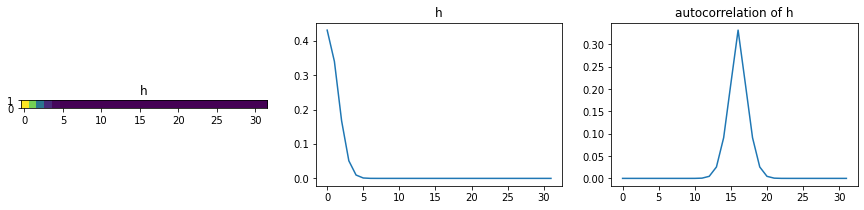

In [7]:
h_x = np.linspace(0,d*10,d)

h_sig=15
h = np.exp(-h_x**2/(2*h_sig**2))

# h = np.fft.fftshift(h)
# h /= np.linalg.norm(h)
h /= np.sum(h)

print(np.sum(h))
# h -= h.mean()

plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
imshowArray(h)
plt.title('h')

plt.subplot(1,3,2)
plt.plot(h)
plt.title('h')

plt.subplot(1,3,3)
plt.plot(fun_auto(h))
plt.title('autocorrelation of h')

plt.show()


In [8]:
# h = np.zeros(d)
# h[0] = 0.8
# h[1] = 0.2
# # h *=0.8
# # h = np.random.randn(d)

# # h /= np.sum(h)
# # h -= h.mean()

# plt.figure(figsize=(15,3))

# plt.subplot(1,3,1)
# imshowArray(h)
# plt.title('h')

# plt.subplot(1,3,2)
# plt.plot(h)
# plt.title('h')

# plt.subplot(1,3,3)
# plt.plot(fun_auto(h))
# plt.title('autocorrelation of h')

# plt.show()


Offline computation

In [9]:
# fake_x_vector = np.array(np.ones(1596)) #so the length of a is DxD (40x40 = 1680)
# fake_a_coef = pywt.wavedec(fake_x_vector,'db1')

# id_vector = np.eye(d).flatten()
# id_array = vec2arrayList(id_vector,fake_a_coef)
# psi_matrix = pywt.waverec(id_array,'db1')
# theta_matrix = fun_conv(h,psi_matrix)

# weight_array = np.zeros(d)
# for i in range(d):
#     weight_i = 1/np.linalg.norm(theta_matrix[:,i])
#     weight_array[i] = weight_i

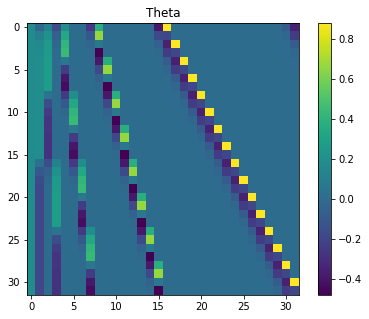

In [10]:
#Offline computation
Theta = np.zeros((d,d))
weight_array = np.zeros(d)

fake_x_vector = np.ones(32)
fake_a_coef = pywt.wavedec(fake_x_vector,'db1')

for a_ii in range(d):
    #step 0
    e_vector = np.zeros(d,dtype=float)
    e_vector[a_ii] = 1
    #step 1
    e_array = vec2arrayList(e_vector,fake_a_coef)
    phi_i = pywt.waverec(e_array,'db1')

    # plt.figure()
    # plt.plot(phi_i)

    #step 2
    # theta_i = signal.fftconvolve(h,phi_i,mode='same')
    theta_i = naive_conv(h,phi_i)
    Theta[:,a_ii] = theta_i/np.linalg.norm(theta_i)
    # # Theta[:,i] = theta_i
    # #step 3
    weight_i = 1/np.linalg.norm(theta_i)
    weight_array[a_ii] = weight_i

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.imshow(Theta)
plt.colorbar()
plt.title('Theta')

# plt.subplot(1,2,2)
# imshowArray(weight_array)
# plt.title('weights array')

plt.show()


In [11]:
# test = np.zeros(32)
# test[3] = 1
# e_array = vec2arrayList(test,fake_a_coef)
# phi_i = pywt.waverec(e_array,'db1')

# plt.figure()
# # plt.plot(Theta[:,0])
# plt.plot(phi_i)
# plt.show()

Output vector x

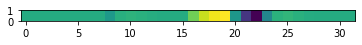

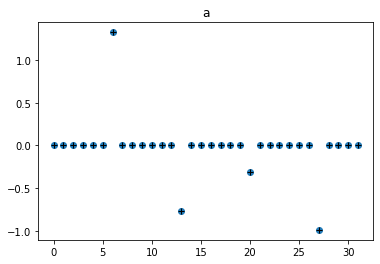

In [12]:
fake_x_vector = np.ones(32)
fake_a_coef = pywt.wavedec(fake_x_vector,'db1')
a_real_array = vec2arrayList(a_real,fake_a_coef)

x = pywt.waverec(a_real_array,'db1')
# y = fun_conv(h,x)
y = manual_conv(x,h)

imshowArray(y)
plt.show()

a_recover_array = pywt.wavedec(x,'db1')
a_recover_vector = arrayList2vec(a_recover_array)
plt.plot(a_real,'o')
plt.plot(a_recover_vector,'k+')
plt.title('a')
plt.show()

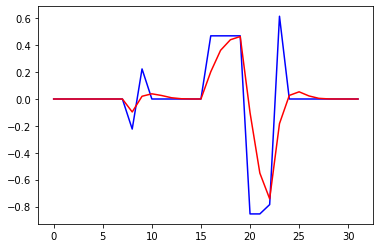

[ 0.          0.          0.          0.          0.          0.
  0.          0.         -0.22364399  0.22364399  0.          0.
  0.          0.          0.          0.          0.46994747  0.46994747
  0.46994747  0.46994747 -0.8549642  -0.8549642  -0.78553949  0.615678
  0.          0.          0.          0.          0.          0.
  0.          0.        ]
[4.30807546e-001 3.39974659e-001 1.67084545e-001 5.11390319e-002
 9.74754420e-003 1.15708273e-003 8.55381989e-005 3.93805955e-006
 1.12909620e-007 2.01607229e-009 2.24185616e-011 1.55251526e-013
 6.69561540e-016 1.79833920e-018 3.00800955e-021 3.13338167e-024
 2.03270276e-027 8.21222693e-031 2.06621018e-034 3.23753551e-038
 3.15922875e-042 1.91988005e-046 7.26597009e-051 1.71253559e-055
 2.51369217e-060 2.29779389e-065 1.30808672e-070 4.63754878e-076
 1.02392214e-081 1.40790019e-087 1.20560013e-093 6.42926309e-100]
[ 1.22350738e-09  1.36800850e-11  9.50574418e-14  4.10819068e-16
  1.10483229e-18  1.84950216e-21  1.92755669e-24 

In [13]:
plt.figure()
plt.plot(x, 'b')
plt.plot(y, 'r')
plt.show()

print(x)
print(h)
print(y)

MP loop

1.0345614824239568
1.2585544997207834
<r(k+1),Θ(i*)> = 0.0, ans: -6.938893903907228e-17
-0.5548245171964032
1.7299570267789341
<r(k+1),Θ(i*)> = 0.0, ans: 1.3877787807814457e-16
-0.3093977908655275
2.8929760418445793
<r(k+1),Θ(i*)> = 0.0, ans: -1.0581813203458523e-16
-0.10932702298898475
2.89297604184458
<r(k+1),Θ(i*)> = 0.0, ans: 1.9576816142072583e-17


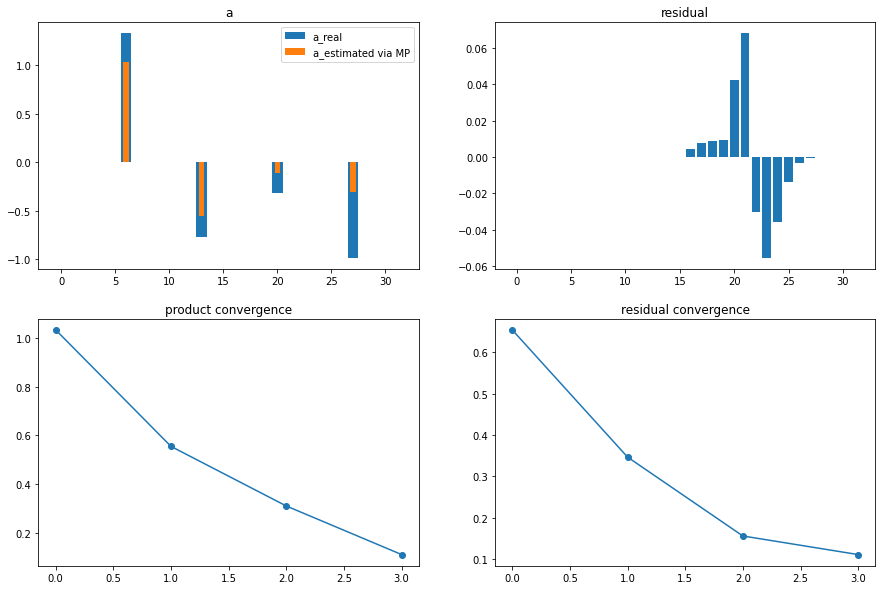

In [14]:
r = np.copy(y)
a = np.zeros(len(a_real))
k = 0
s = 4
plotting_product = np.array([])
plotting_residue = np.array([])

while (k<s):
    # plt.figure()
    # plt.plot(r)
    # plt.show()

    #atom selection
    arg2max_array = np.zeros(d)
    for i in range(d):
        arg2max = abs(Theta[:,i]@r) #*weight_array[i])
        # arg2max = abs(weight_array* fftconvolve(pywt.wavedec(r)))
        arg2max_array[i] = arg2max

    i_star, = np.where(arg2max_array==np.amax(arg2max_array))
    i_star = int(i_star[0])
    c = Theta[:,i_star]@r #*weight_array[i_star]

    print(c)
    print(weight_array[i_star])

    #coef. update
    # e = np.zeros(len(a_real))
    # e[i_star]=1
    # a = a + c*e
    a[i_star] = c

    #residual update
    r -= c*Theta[:,i_star] #*weight_array[i_star]
    print('<r(k+1),Θ(i*)> = 0.0, ans:',float(r@Theta[:,i_star]))
    

    #plotting elements
    plotting_product = np.append(plotting_product,arg2max_array[i_star])
    plotting_residue = np.append(plotting_residue,np.linalg.norm(r))

    k += 1
    
    # print(np.amax(arg2max_array[0,:]))
    # plt.bar(range(d),arg2max_array[0,:])
    # plt.show()
    # plt.bar(range(d),a[:,0])
    # plt.show()

fig = plt.figure(figsize=(15,10))

fig.add_subplot(2, 2, 1)
plt.bar(range(d), a_real, width=1, label='a_real')
plt.bar(range(d), a, width=0.5, label='a_estimated via MP')
plt.title('a')
plt.legend()

fig.add_subplot(2, 2, 2)
plt.bar(range(d),r)
plt.title('residual')

fig.add_subplot(2, 2, 3)
plt.plot(plotting_product,'o-')
plt.title('product convergence')

fig.add_subplot(2, 2, 4)
plt.plot(plotting_residue,'o-')
plt.title('residual convergence')
plt.show()

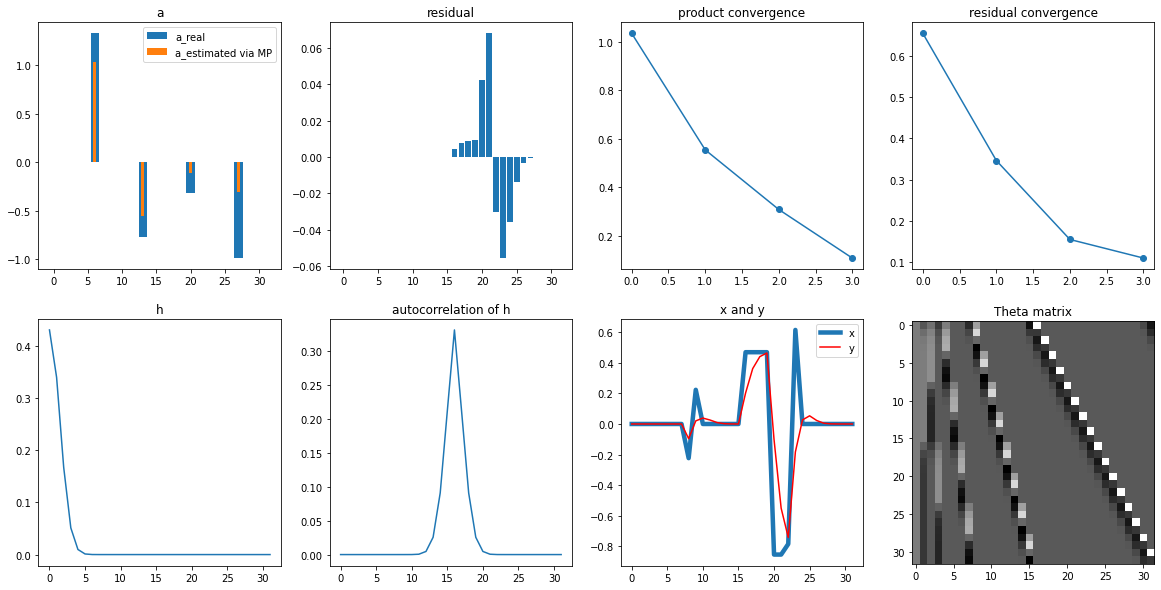

In [15]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(2, 4, 1)
plt.bar(range(d), a_real, width=1.2, label='a_real')
plt.bar(range(d), a, width=0.4, label='a_estimated via MP')
plt.title('a')
plt.legend()

fig.add_subplot(2, 4, 2)
plt.bar(range(d),r)
plt.title('residual')

fig.add_subplot(2, 4, 3)
plt.plot(plotting_product,'o-')
plt.title('product convergence')

fig.add_subplot(2, 4, 4)
plt.plot(plotting_residue,'o-')
plt.title('residual convergence')

fig.add_subplot(2, 4, 5)
plt.plot(h)
plt.title('h')

fig.add_subplot(2, 4, 6)
plt.plot(fun_auto(h))
plt.title('autocorrelation of h')

# fig.add_subplot(2, 4, 7)
# plt.plot(x,label='x')
# plt.plot(y,'r',label='y',linestyle = (0,(10,10)))
# plt.legend()
# plt.title('x and y')

fig.add_subplot(2, 4, 7)
plt.plot(x,label='x',linewidth=4.5)
plt.plot(y,'r',label='y',linewidth=1.5)
plt.legend()
plt.title('x and y')

fig.add_subplot(2, 4, 8)
plt.imshow(Theta, cmap='gray')
plt.title('Theta matrix')

plt.savefig('resultats/mp_1d1.png', bbox_inches='tight')
plt.show()

In [16]:
print(a/a_real)
print(a_real/a)

[       nan        nan        nan        nan        nan        nan
 0.77832682        nan        nan        nan        nan        nan
        nan 0.72052002        nan        nan        nan        nan
        nan        nan 0.34566491        nan        nan        nan
        nan        nan        nan 0.31226741        nan        nan
        nan        nan]
[       nan        nan        nan        nan        nan        nan
 1.28480733        nan        nan        nan        nan        nan
        nan 1.38788649        nan        nan        nan        nan
        nan        nan 2.89297514        nan        nan        nan
        nan        nan        nan 3.20238352        nan        nan
        nan        nan]


C:\Users\Usuari\AppData\Local\Temp\ipykernel_3124\26155672.py:1: RuntimeWarning: invalid value encountered in true_divide
  print(a/a_real)
C:\Users\Usuari\AppData\Local\Temp\ipykernel_3124\26155672.py:2: RuntimeWarning: invalid value encountered in true_divide
  print(a_real/a)


In [17]:
# print(np.linalg.norm(x))
# xx = pywt.waverec(pywt.wavedec(x,'db1'),'db1')
# print(np.linalg.norm(xx))


In [18]:
# A = np.array([1,1,0])
# B = np.array([1,3,-2])

# print(naive_conv(A, B))

# C = np.zeros(len(A))
# for m in range(len(A)):
#     for i in range(len(B)):
#         C[m]=C[m]+A[i]*B[m-i]

# print(C)

In [19]:
print(weight_array)

[1.         1.06788227 1.10745324 1.10745324 1.2585545  1.2585545
 1.2585545  1.2585545  1.72995703 1.72995703 1.72995703 1.72995703
 1.72995703 1.72995703 1.72995703 1.72995703 2.89297604 2.89297604
 2.89297604 2.89297604 2.89297604 2.89297604 2.89297604 2.89297604
 2.89297604 2.89297604 2.89297604 2.89297604 2.89297604 2.89297604
 2.89297604 2.89297604]


In [20]:
# [       nan        nan        nan        nan        nan        nan
#  1.28480733        nan        nan        nan        nan        nan
#         nan 1.38788649        nan        nan        nan        nan
#         nan        nan 2.89297514        nan        nan        nan
#         nan        nan        nan 3.20238352   

1.7299570267789341

1.7299570267789341